<b><h1 align="center">Regressão Linear e Correlação</h1><b>

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

<p align="left"><b>Autor:</b> Yuri José Soares de Araújo</p>

<p align="left"><b>Matrícula:</b> 1520658</p>

<p align="left"><b>Curso:</b> Engenharia de Computação</p>

&nbsp;

&nbsp;

&nbsp;

&nbsp;

<p align="center"> Fortaleza, 14 de Outubro de 2018</p>

&nbsp;

&nbsp;

&nbsp;

&nbsp;

<h1 align="center">Introdução</h1>

<p align="left">Regressão linear é uma técnica bastante utilizada para descobrir se há e qual a correlação entre duas variáveis, estas chamadas de variável independente e dependente. O método de regressão linear é baseado no coeficiente de Pearson:</p>

\begin{align}
r = \frac{{}\sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})}
{\sqrt{\sum_{i=1}^{n} (x_i - \overline{x})^2(y_i - \overline{y})^2}} \\
\end{align}

<p>Que pode ser resumido em:</p>

\begin{align}
r = \frac{{S_{xy}}}{{\sqrt{S_{xx}.S_{yy}}}}
\end{align}

<p>Lembrando ainda que a fórmula descrita acima é valida se, e somente se, ${1 \leq r \leq 1}$, que é a variância descrita pelo coeficiente de Pearson. Em termos práticos, um ${r}$ mais próximo de ${-1}$ significa uma maior correlação negativa, já o contrário, quando o ${r}$ é próximo de ${1}$, existe uma maior correlação positiva. Quando o ${r}$ tende a zero podemos interpretar que não há correlação entre as duas variáveis.</p>

<p>O algoritmo de regressão linear é também um dos algoritmos de predição utilizados no <i>Machine Learning</i> mais populares devido a sua simplicidade. Na seção de análise irei realizar uma pequena demonstração do algoritmo utilizando a biblioteca <i>Scikit Learn</i> para calcular uma predição baseada em um dataset pré estabelecido.</p>

&nbsp;

<h1 align="center">Objetivo Geral</h1>

<p>Por meio deste <i>Notebook</i> desejo utilizar de <i>Computação Interativa</i> para demonstrar e analisar dados de difícil compreensão e para isto escolhi a linguagem de programação <i>Python</i>, bastante reconhecida no meio acadêmico e com ampla aplicação na área de <i>Data Science</i> juntamente com seu <i>framework</i> de Análise de Dados, o <i>Jupyter Notebook</i>, que veio trazer algumas funcionalidade já reconhecidas no R Studio para o <i>Python</i>.</p>

&nbsp;

<h1 align="center">Análise e Interpretação dos Dados</h1>

<p>A seguir irei fazer uma demonstração dos algoritmo de Regressão Linear e seu uso em <i>Machine Learning</i> com predição de dados. Como sugerido na introdução, irei explicar passo a passo cada resultado para que até iniciantes em Ciência de Dados ou mesmo em <i>Python</i> possam acompahar.</p>

<p>Ao final de cada seção, irei fazer uma breve revisão para fixar o conteúdo ensinado e para que possamos passar para o próximo estágio sem dúvidas.</p>

&nbsp;

<p>Começando pelo bloco abaixo, onde apenas chamo as bibliotecas matemáticas que irei utilizar para me ajudar durante o processo de análise, manipulação e visualização dos dados.</p>

In [295]:
%matplotlib inline
import matplotlib.pyplot as plt # invocando o método pyplot para plotar os dados
import numpy as np # biblioteca de manipulação dos dados
import pandas as pd # o mesmo que a de cima, porém mais simples e mais limitada
from sklearn import linear_model # biblioteca que guarda algoritmos de Machine Learning 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score # funções de métrica para avaliar o meu treinamento
from scipy.stats import pearsonr # calcula o coeficiente de Pearson
from math import sqrt
from sympy import Matrix

<h2>1a Questão</h2>

<p>Agora vou carregar o dataset da planilha para a memória para que possa ser manipulado e utilizarei as colunas 7 e 8, equivalentes a coluna "Número de Pessoas na Família" e a coluna de "Lixo Gerado".</p>

In [296]:
df = pd.read_excel('../data/database.xls', sheet_name='Dados 3', usecols=[7, 8])

<p>Exibe as primeiras 5 entradas do dataset, lembrando que assim como muitas linguagens de programação, o <i>Python</i> considera o primeiro índice de uma lista como ${0}$, então lembre-se de fazer essa subtração quando estiver olhando para a planilha. Deixei esta função apenas para validar se os dados e os nomes das colunas estavam inseridos de forma correta.</p>

In [297]:
df.head()

,Nº de Pessoas na Família,Lixo Gerado
0,2,64
1,1,32
2,1,40
3,2,73
4,2,64


In [298]:
pessoas_train = df['Nº de Pessoas na Família'].values[:30].reshape(-1, 1)
lixo_train = df['Lixo Gerado'].values[:30].reshape(-1, 1)
pessoas_test = df['Nº de Pessoas na Família'].values[30:].reshape(-1, 1)
lixo_test = df['Lixo Gerado'].values[30:].reshape(-1, 1)
regr = linear_model.LinearRegression()
regr.fit(pessoas_train, lixo_train)
lixo_predict = regr.predict(pessoas_test)

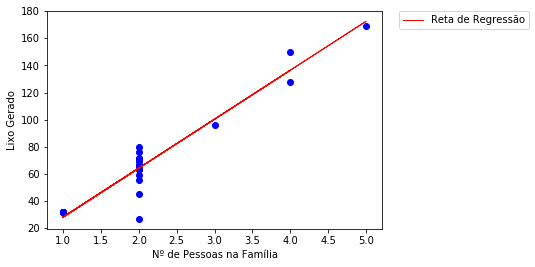

In [299]:
plt.scatter(pessoas_test, lixo_test, color='blue')
plt.plot(pessoas_test, lixo_predict, color='red', linewidth=1, label="Reta de Regressão")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Nº de Pessoas na Família")
plt.ylabel("Lixo Gerado")
plt.show()

In [300]:
print(f'O coeficiente angular de {df.columns[1]} é {str(regr.coef_[0][0])[:5]}\
 e a interseção da reta é {str(regr.intercept_[0])[:5]}.\
 A equação resultante é:\n y = {str(regr.coef_[0][0])[:5]}x{str(regr.intercept_[0])[:5]}')

O coeficiente angular de Lixo Gerado é 36.06 e a interseção da reta é -7.73. A equação resultante é:
 y = 36.06x-7.73


In [301]:
print(f"O coeficiente de determinação é {str(r2_score(lixo_train, lixo_predict))[:5]}.")

O coeficiente de determinação é -1.31.


In [302]:
print(f"A estimativa do volume de lixo gerado por uma família de 4 pessoas é\
 {str(regr.predict([[4]])[0][0])[:5]}.")

A estimativa do volume de lixo gerado por uma família de 4 pessoas é 136.5.


<p><b>Média:</b></p>

In [303]:
print(f'Nº de Pessoas na Família: {df["Nº de Pessoas na Família"].mean()}')
print(f'Lixo Gerado: {df["Lixo Gerado"].mean()}')

Nº de Pessoas na Família: 2.05
Lixo Gerado: 66.15


<p><b>Mediana:</b></p>

In [304]:
print(f'Nº de Pessoas na Família: {df["Nº de Pessoas na Família"].median()}')
print(f'Lixo Gerado: {df["Lixo Gerado"].median()}')

Nº de Pessoas na Família: 2.0
Lixo Gerado: 64.0


<p><b>Desvio padrão:</b></p>

In [305]:
print(f'Nº de Pessoas na Família: {df["Nº de Pessoas na Família"].std()}')
print(f'Lixo Gerado: {df["Lixo Gerado"].std()}')

Nº de Pessoas na Família: 0.9099264265284941
Lixo Gerado: 33.96899134330244


<p><b>Variância:</b></p>

In [306]:
print(f'Nº de Pessoas na Família: {df["Nº de Pessoas na Família"].var()}')
print(f'Lixo Gerado: {df["Lixo Gerado"].var()}')

Nº de Pessoas na Família: 0.8279661016949149
Lixo Gerado: 1153.892372881356


<p>Mais informações sobre o dataset:</p>

In [307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
Nº de Pessoas na Família    60 non-null int64
Lixo Gerado                 60 non-null int64
dtypes: int64(2)
memory usage: 1.0 KB


&nbsp;

<h2>2a Questão</h2>

In [308]:
df2 = pd.read_excel('../data/database.xls', sheet_name='Dados 8', usecols=[0, 1])

In [309]:
df2.head()

,X,Y
0,22.0,64.03
1,20.0,62.47
2,18.0,54.94
3,16.0,48.84
4,14.0,43.73


In [310]:
x_train = df2['X'].values[:12].reshape(-1, 1)
y_train = df2['Y'].values[:12].reshape(-1, 1)
x_test = df2['X'].values[12:].reshape(-1, 1)
y_test = df2['Y'].values[12:].reshape(-1, 1)
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
y_predict = regr.predict(x_test)

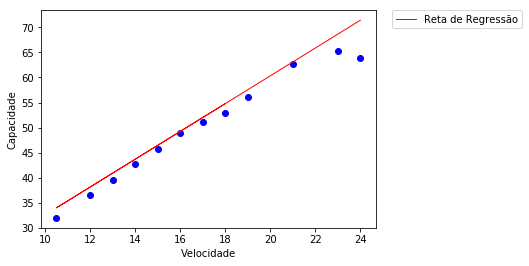

In [311]:
plt.scatter(x_test, y_test, color='blue')
plt.plot(x_test, y_predict, color='red', linewidth=1, label="Reta de Regressão")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Velocidade")
plt.ylabel("Capacidade")
plt.show()

In [312]:
print(f'O coeficiente angular de {df2.columns[1]} é {str(regr.coef_[0][0])[:5]}\
 e a interseção da reta é {str(regr.intercept_[0])[:5]}.\
 A equação resultante é:\n y = {str(regr.coef_[0][0])[:5]}x + {str(regr.intercept_[0])[:5]}')

O coeficiente angular de Y é 2.766 e a interseção da reta é 4.991. A equação resultante é:
 y = 2.766x + 4.991


In [313]:
print(f"O coeficiente de determinação é {str(r2_score(y_train, y_predict))[:5]}.")

O coeficiente de determinação é 0.222.


In [314]:
print(f"A estimativa da capacidade da máquina para uma velocidade de 15 rpm é\
 {str(regr.predict([[15]])[0][0])[:5]}.")

A estimativa da capacidade da máquina para uma velocidade de 15 rpm é 46.48.


<p><b>Média:</b></p>

In [315]:
print(f'Velocidade: {df2["X"].mean()}')
print(f'Capacidade: {str(df2["Y"].mean())[:6]}')

Velocidade: 17.4375
Capacidade: 52.298


<p><b>Mediana:</b></p>

In [316]:
print(f'Velocidade: {df2["X"].median()}')
print(f'Capacidade: {df2["Y"].median()}')

Velocidade: 17.5
Capacidade: 52.035


<p><b>Desvio padrão:</b></p>

In [317]:
print(f'Velocidade: {str(df2["X"].std())[:4]}')
print(f'Capacidade: {str(df2["Y"].std())[:5]}')

Velocidade: 3.76
Capacidade: 10.14


<p><b>Variância:</b></p>

In [318]:
print(f'Velocidade: {str(df2["X"].var())[:5]}')
print(f'Capacidade: {str(df2["Y"].var())[:6]}')

Velocidade: 14.20
Capacidade: 102.91


<p>Mais informações sobre o dataset:</p>

In [319]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
X    24 non-null float64
Y    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


&nbsp;

<h2>3a Questão</h2>

In [320]:
df = pd.read_excel('../data/database.xls', sheet_name='Dados 3', usecols=[7, 8])
df2 = pd.read_excel('../data/database.xls', sheet_name='Dados 8', usecols=[0, 1])
for i in range(0, len(df['Lixo Gerado'].values)):
    df['Lixo Gerado'][i] = df['Lixo Gerado'][i]*1.15 + 5

In [321]:
df.head()

,Nº de Pessoas na Família,Lixo Gerado
0,2,78
1,1,41
2,1,51
3,2,88
4,2,78


In [322]:
pessoas_train = df['Nº de Pessoas na Família'].values[:30].reshape(-1, 1)
lixo_train = df['Lixo Gerado'].values[:30].reshape(-1, 1)
pessoas_test = df['Nº de Pessoas na Família'].values[30:].reshape(-1, 1)
lixo_test = df['Lixo Gerado'].values[30:].reshape(-1, 1)
regr = linear_model.LinearRegression()
regr.fit(pessoas_train, lixo_train)
lixo_predict = regr.predict(pessoas_test)

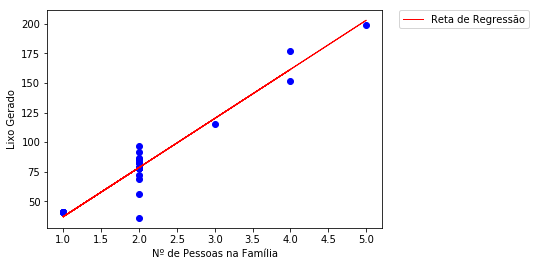

In [323]:
plt.scatter(pessoas_test, lixo_test, color='blue')
plt.plot(pessoas_test, lixo_predict, color='red', linewidth=1, label="Reta de Regressão")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Nº de Pessoas na Família")
plt.ylabel("Lixo Gerado")
plt.show()

In [324]:
print(f'O coeficiente angular de {df.columns[1]} é {str(regr.coef_[0][0])[:5]}\
 e a interseção da reta é {str(regr.intercept_[0])[:5]}.\
 A equação resultante é:\n y = {str(regr.coef_[0][0])[:5]}x{str(regr.intercept_[0])[:5]}')

O coeficiente angular de Lixo Gerado é 41.49 e a interseção da reta é -4.48. A equação resultante é:
 y = 41.49x-4.48


In [325]:
print(f"O coeficiente de determinação é {str(r2_score(lixo_train, lixo_predict))[:5]}.")

O coeficiente de determinação é -1.31.


In [326]:
print(f"A estimativa do volume de lixo gerado por uma família de 4 pessoas é\
 {str(regr.predict([[4]])[0][0])[:5]}.")

A estimativa do volume de lixo gerado por uma família de 4 pessoas é 161.5.


<p><b>Média:</b></p>

In [327]:
print(f'Nº de Pessoas na Família: {df["Nº de Pessoas na Família"].mean()}')
print(f'Lixo Gerado: {str(df["Lixo Gerado"].mean())[:5]}')

Nº de Pessoas na Família: 2.05
Lixo Gerado: 80.53


<p><b>Mediana:</b></p>

In [328]:
print(f'Nº de Pessoas na Família: {df["Nº de Pessoas na Família"].median()}')
print(f'Lixo Gerado: {df["Lixo Gerado"].median()}')

Nº de Pessoas na Família: 2.0
Lixo Gerado: 78.0


<p><b>Desvio padrão:</b></p>

In [329]:
print(f'Nº de Pessoas na Família: {str(df["Nº de Pessoas na Família"].std())[:5]}')
print(f'Lixo Gerado: {str(df["Lixo Gerado"].std())[:5]}')

Nº de Pessoas na Família: 0.909
Lixo Gerado: 39.11


<p><b>Variância:</b></p>

In [330]:
print(f'Nº de Pessoas na Família: {str(df["Nº de Pessoas na Família"].var())[:5]}')
print(f'Lixo Gerado: {str(df["Lixo Gerado"].var())[:7]}')

Nº de Pessoas na Família: 0.827
Lixo Gerado: 1529.77


<p>Mais informações sobre o dataset:</p>

In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
Nº de Pessoas na Família    60 non-null int64
Lixo Gerado                 60 non-null int64
dtypes: int64(2)
memory usage: 1.0 KB


&nbsp;

<h2>4a Questão</h2>

In [332]:
x = [4, 5, 4, 5, 8, 9, 10, 11, 12, 12]
y = [1, 1, 2, 3, 3, 5, 5, 6, 6, 6]
z = [6, 7, 10, 10, 11, 9, 12, 10, 11, 14]

df = pd.DataFrame({'x': x, 'y': y, 'z': z})

In [333]:
df.head()

,x,y,z
0,4,1,6
1,5,1,7
2,4,2,10
3,5,3,10
4,8,3,11


In [334]:
print(f'O coeficiente de correlação de x pra y é {str(pearsonr(x, y))[1:5]} e o de x para z é\
 {str(pearsonr(x, z))[1:5]}, portanto Y é a melhor variável para estimar o valor de X')

O coeficiente de correlação de x pra y é 0.94 e o de x para z é 0.70, portanto Y é a melhor variável para estimar o valor de X


&nbsp;

<h2>5a questão</h2>

In [344]:
df = pd.DataFrame({'Estudante': [1, 2, 3, 4, 5, 6, 7, 8, 9],\
                   'Horas Diárias de Estudo': [1, 1.5, 2.5, 2.5, 3, 3.5, 4, 4.5, 5],\
                   'Desempenho na Disciplina': [60, 51, 70, 80, 86, 50, 93, 94, 88]})

In [345]:
df.head()

,Estudante,Horas Diárias de Estudo,Desempenho na Disciplina
0,1,1.0,60
1,2,1.5,51
2,3,2.5,70
3,4,2.5,80
4,5,3.0,86


In [346]:
reduced_form, inds = Matrix(df[['Desempenho na Disciplina', 'Horas Diárias de Estudo']].values).rref()

In [347]:
reduced_form

Matrix([
[1, 0],
[0, 1],
[0, 0],
[0, 0],
[0, 0],
[0, 0],
[0, 0],
[0, 0],
[0, 0]])

In [348]:
inds

(0, 1)

<p>O método ${rref}$ me retorna os índices das colunas linearmente independentes, sendo a coluna 0 equivalente a 'Desempenho na Disciplina' e a coluna 1 equivalente a 'Horas Diárias de Estudo'.</p>

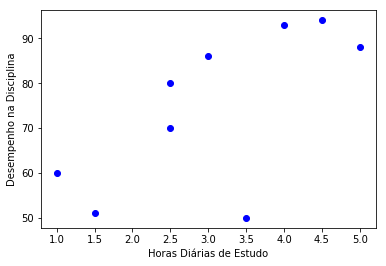

In [359]:
x = df['Horas Diárias de Estudo'].values
y = df['Desempenho na Disciplina'].values
plt.scatter(x, y, color='blue')
plt.xlabel("Horas Diárias de Estudo")
plt.ylabel("Desempenho na Disciplina")
plt.show()

In [360]:
print(f'O coeficiente de correlação de x pra y é {str(pearsonr(x, y))[1:5]}.')

O coeficiente de correlação de x pra y é 0.67.


In [361]:
regr = linear_model.LinearRegression()
regr.fit(x.reshape(-1, 1), y.reshape(-1, 1))
y_predict = regr.predict([[3]])

In [366]:
print(f'Para 3 horas de estudo é estimado um desempenho equivalente a {str(y_predict[0][0])[:5]}.')

Para 3 horas de estudo é estimado um desempenho equivalente a 74.17.


<p><b>Média:</b></p>

In [369]:
print(f'Horas Diárias de Estudo: {str(df["Horas Diárias de Estudo"].mean())[:5]}')
print(f'Desempenho na Disciplina: {str(df["Desempenho na Disciplina"].mean())[:5]}')

Horas Diárias de Estudo: 3.055
Desempenho na Disciplina: 74.66


<p><b>Mediana:</b></p>

In [370]:
print(f'Horas Diárias de Estudo: {df["Horas Diárias de Estudo"].median()}')
print(f'Desempenho na Disciplina: {df["Desempenho na Disciplina"].median()}')

Horas Diárias de Estudo: 3.0
Desempenho na Disciplina: 80.0


<p><b>Desvio padrão:</b></p>

In [371]:
print(f'Horas Diárias de Estudo: {str(df["Horas Diárias de Estudo"].std())[:5]}')
print(f'Desempenho na Disciplina: {str(df["Desempenho na Disciplina"].std())[:5]}')

Horas Diárias de Estudo: 1.333
Desempenho na Disciplina: 17.5


<p><b>Variância:</b></p>

In [374]:
print(f'Horas Diárias de Estudo: {str(df["Horas Diárias de Estudo"].var())[:5]}')
print(f'Desempenho na Disciplina: {str(df["Desempenho na Disciplina"].var())[:7]}')

Horas Diárias de Estudo: 1.777
Desempenho na Disciplina: 306.25


<p>Mais informações sobre o dataset:</p>

In [375]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
Estudante                   9 non-null int64
Horas Diárias de Estudo     9 non-null float64
Desempenho na Disciplina    9 non-null int64
dtypes: float64(1), int64(2)
memory usage: 296.0 bytes


&nbsp;

<h1 align="center">Referências Bibliográficas</h1>

<p>POLAMURI, Saimadhu. "Data Mining with Python: Implementing Classification and Regression". Packt Publishing Company (2016)</p>

<p>https://www.eecis.udel.edu/~portnoi/classroom/prob_estatistica/2006_2/lecture_slides/aula20.pdf</p>

<p>http://statisticsbyjim.com/glossary/regression-coefficient/</p>

<p>BURGER, Scott V. "Introduction to Machine Learning with R". O'Reilly Media (2018)</p>